In [15]:
import numpy as np
import pandas as pd

In [16]:
data = pd.read_csv('python_cves_component1_new.csv',parse_dates=["published_ts"])

data.head()

,cve_id,published_ts,cvss3_base_score,problemtype_json,repo_url,repo_name
0,CVE-2000-0062,2000-01-04 05:00:00+00:00,NaN,"[{'description': [{'lang': 'en', 'value': 'NVD...",https://github.com/zopefoundation/Zope,zopefoundation/Zope
1,CVE-2000-0062,2000-01-04 05:00:00+00:00,NaN,"[{'description': [{'lang': 'en', 'value': 'NVD...",https://github.com/zopefoundation/Zope,zopefoundation/Zope
2,CVE-2000-0062,2000-01-04 05:00:00+00:00,NaN,"[{'description': [{'lang': 'en', 'value': 'NVD...",https://github.com/zopefoundation/Zope,zopefoundation/Zope
3,CVE-2000-0062,2000-01-04 05:00:00+00:00,NaN,"[{'description': [{'lang': 'en', 'value': 'NVD...",https://github.com/zopefoundation/Zope,zopefoundation/Zope
4,CVE-2000-0062,2000-01-04 05:00:00+00:00,NaN,"[{'description': [{'lang': 'en', 'value': 'NVD...",https://github.com/zopefoundation/Zope,zopefoundation/Zope


In [17]:
data.columns

Index(['cve_id', 'published_ts', 'cvss3_base_score', 'problemtype_json',
       'repo_url', 'repo_name'],
      dtype='object')

In [18]:
data.shape

(15706, 6)

In [19]:
data["cvss3_base_score"] = pd.to_numeric(data["cvss3_base_score"], errors="coerce")
data["year"] = data["published_ts"].dt.year
data["year"].value_counts().sort_index()

year
2000      50
2001      50
2002      40
2004      20
2005      20
2006      88
2007     103
2008     224
2009      82
2010     199
2011     264
2012     256
2013     378
2014    1142
2015     248
2016     425
2017     916
2018     938
2019    1228
2020    1443
2021    1393
2022    1701
2023    2515
2024    1983
Name: count, dtype: int64

In [20]:
def cvss_bucket(s):
    if pd.isna(s):
        return "unknown"
    if s < 4: return "low"
    if s < 7: return "medium"
    if s < 9: return "high"
    return "critical"

data["cvss_bucket"] = data["cvss3_base_score"].apply(cvss_bucket)
data["cvss_bucket"].value_counts()


cvss_bucket
medium      5294
unknown     4228
high        4122
critical    1823
low          239
Name: count, dtype: int64

In [21]:
for x in data["problemtype_json"].dropna().head(5):
    print(x)
    print("----")


[{'description': [{'lang': 'en', 'value': 'NVD-CWE-Other'}]}]
----
[{'description': [{'lang': 'en', 'value': 'NVD-CWE-Other'}]}]
----
[{'description': [{'lang': 'en', 'value': 'NVD-CWE-Other'}]}]
----
[{'description': [{'lang': 'en', 'value': 'NVD-CWE-Other'}]}]
----
[{'description': [{'lang': 'en', 'value': 'NVD-CWE-Other'}]}]
----


In [22]:
print(data["problemtype_json"].dropna().iloc[0])
print(type(data["problemtype_json"].dropna().iloc[0]))


[{'description': [{'lang': 'en', 'value': 'NVD-CWE-Other'}]}]
<class 'str'>


In [23]:
import json
import ast  # Python's literal parser

def extract_cwe(row):
    try:
        # Convert Python literal → Python object
        arr = ast.literal_eval(row)   # Handles single quotes safely
        
        if isinstance(arr, list) and len(arr) > 0:
            desc = arr[0].get("description", [])
            if isinstance(desc, list) and len(desc) > 0:
                return desc[0].get("value")
        return None
    except Exception:
        return None

data["cwe"] = data["problemtype_json"].apply(extract_cwe)



In [24]:
data["cwe"].value_counts().head(20)

cwe
CWE-79            2082
NVD-CWE-noinfo    1040
CWE-200            844
NVD-CWE-Other      761
CWE-20             751
CWE-22             638
CWE-264            572
CWE-601            342
CWE-287            339
CWE-78             336
CWE-89             324
CWE-399            310
CWE-352            287
CWE-94             274
CWE-532            262
CWE-502            206
CWE-77             206
CWE-918            196
CWE-400            191
CWE-362            190
Name: count, dtype: int64

In [54]:
repo_names = data["repo_name"].value_counts()
repo_names = repo_names[repo_names > 50]
repo_names

repo_name
python/cpython                1099
apache/airflow                 757
django/django                  570
ansible/ansible                484
saltstack/salt                 479
odoo/odoo                      391
netbox-community/netbox        390
openstack/nova                 372
openstack/keystone             336
plone/plone.namedfile          327
plone/Products.CMFPlone        298
zopefoundation/Zope            260
Checkmk/checkmk                250
zulip/zulip                    248
openstack/neutron              227
python-pillow/Pillow           222
mlflow/mlflow                  207
freeipa/freeipa                180
matrix-org/synapse             171
vyperlang/vyper                165
viewvc/viewvc                  159
openstack/horizon              157
frappe/frappe                  155
jumpserver/jumpserver          154
hhyo/Archery                   150
plone/Plone                    136
openstack/glance               115
openstack/swift                115
home-assis

In [55]:
repo_names.index.to_series().to_csv('repo_names.txt', index=False, header=False)

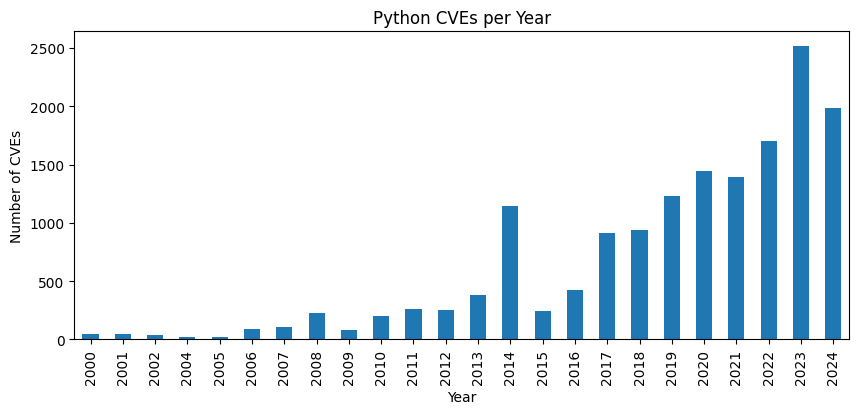

In [26]:
import matplotlib.pyplot as plt

data["year"].value_counts().sort_index().plot(kind="bar", figsize=(10,4))
plt.title("Python CVEs per Year")
plt.xlabel("Year")
plt.ylabel("Number of CVEs")
plt.show()

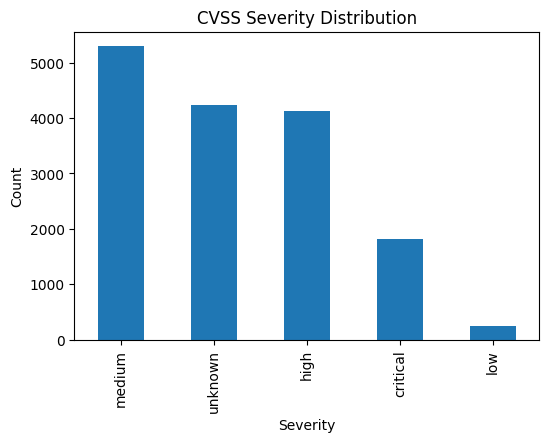

In [27]:
data["cvss_bucket"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("CVSS Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

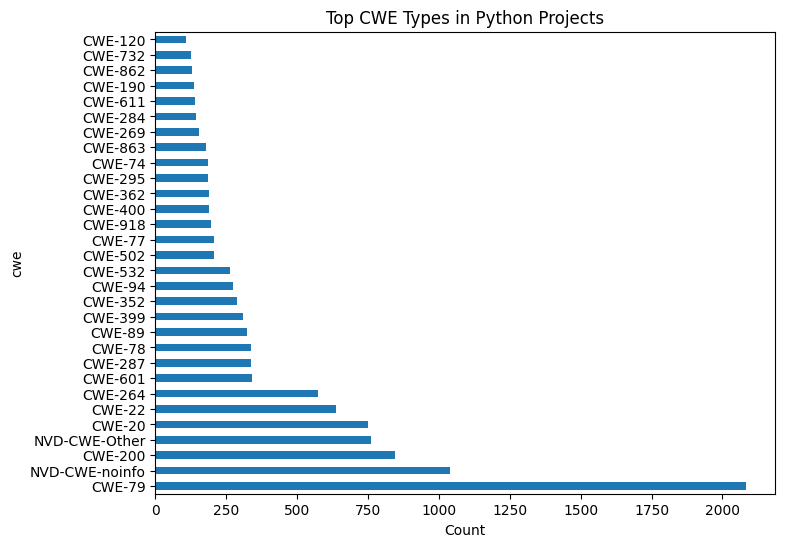

In [28]:
data["cwe"].value_counts().head(30).plot(kind="barh", figsize=(8,6))
plt.title("Top CWE Types in Python Projects")
plt.xlabel("Count")
plt.show()